**Author- Abhishek GC**

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display_html

In [3]:
df = pd.read_csv('aerofit_treadmill.csv')
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


## Products sold by Aerofit 

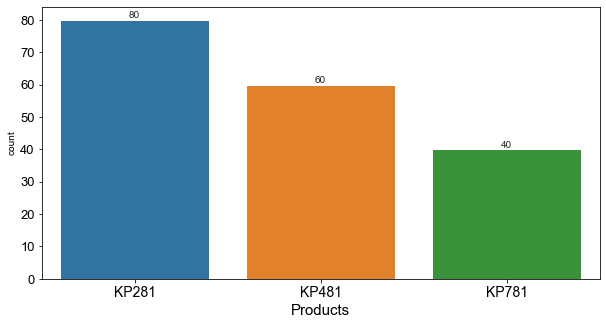

In [5]:
plt.figure(figsize=(10,5));plt.xticks(fontsize=14);plt.yticks(fontsize=13);
sns.set_style('white');
ax = sns.countplot(data = df, x = 'Product');
for container in ax.containers:
    ax.bar_label(container)
ax.set_xlabel("Products", fontsize=15);

***
## Products Short form
* ### KP281 -> P1
* ### KP481 -> P2
* ### KP781 -> P3
***

In [6]:
sns.set_style('darkgrid');

### Missing values & Outlier treatment: 

In [7]:
df.isna().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

 #### There are no missing values in this dataset !
 ### Outlier detection -
 ***

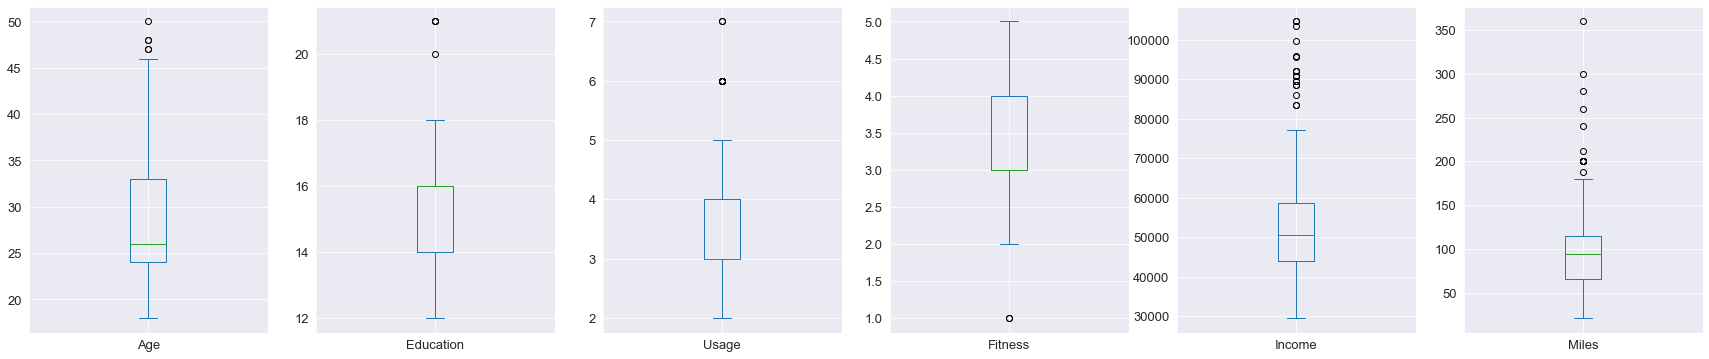

In [8]:
# Finding outliers using Box plots
df.plot(figsize=(30,6), subplots=True, layout=(1,6), kind='box',fontsize=13 );

 #### 'Income & Miles' seem to have a lot of outliers. 

In [9]:
# Outlier computation
Q3 = np.percentile( df['Income'] , 75)
Q1 = np.percentile( df['Income'] , 25)
IQR = Q3-Q1
upperBound = Q3 + 1.5*IQR
# [df.Income > upperBound]
df['Product'][df.Income > upperBound].value_counts()

KP781    19
Name: Product, dtype: int64

In [10]:
df['Product'][df.Income > upperBound].count() / df[df['Product']=='KP781'].shape[0] *100

47.5

 #### Customers in the outlier region contributes to **48%** of the sales of Product-3 (KP781). So I decided **not** to filter them out.
***

### Age/Miles classification: 
#### Creating an Age group of 20s, 30s, 40s. For convinience, Values less than 20(4) and greater than 50(1) will be grouped to 20s and 40s group respectively. 
#### Creating Miles group ['0-50', '50-100', '100-150', '150-200', '200+']

In [11]:

df['Age'].mask(df['Age'] < 20, 20, inplace=True)
df['Age'].mask(df['Age'] >= 50, 49, inplace=True)
df['AgeGroup'] = [ str(age//10 *10)+"s" for age in df.Age] 

df['MilesGroup'] = pd.cut(df['Miles'], [0,50,100,150,200,500], labels=['0-50', '50-100', '100-150', '150-200','200+'])

In [12]:
df.head(3)

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,AgeGroup,MilesGroup
0,KP281,20,Male,14,Single,3,4,29562,112,20s,100-150
1,KP281,20,Male,15,Single,2,3,31836,75,20s,50-100
2,KP281,20,Female,14,Partnered,4,3,30699,66,20s,50-100


# Analysis

In [13]:
## Classifying Products based on Gender 

In [14]:
p1 = pd.crosstab(df['Gender'], df['Product'])
p2 = pd.crosstab(df['Gender'], df['Product'],normalize=True)

In [15]:
df1_styler = p1.style.set_table_attributes("style='display:inline'").set_caption('Gender vs Product')
df2_styler = p2.style.set_table_attributes("style='display:inline'").set_caption('Probabilities (Gender vs Product)')
space = ""
for i in range(25): space += '\xa0'   

display_html(df1_styler._repr_html_()+ space +df2_styler._repr_html_(), raw=True)

Product,KP281,KP481,KP781
Gender,,,
Female,40,29,7
Male,40,31,33
Product,KP281,KP481,KP781
Gender,,,
Female,0.222222,0.161111,0.038889
Male,0.222222,0.172222,0.183333


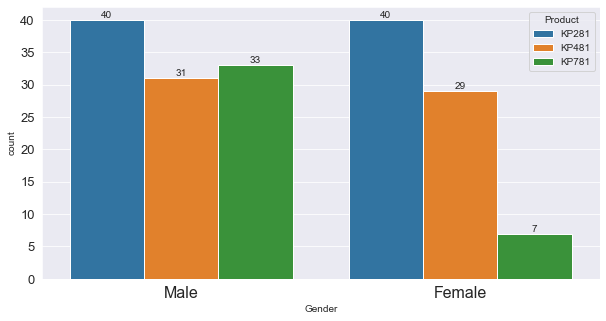

In [16]:
plt.figure(figsize=(10,5));plt.xticks(fontsize=16);plt.yticks(fontsize=13);

ax = sns.countplot(data=df,x='Gender', hue='Product');
for container in ax.containers:
    ax.bar_label(container)

## **Insight** 
### From the above graph, Most Female customers tend to buy Product P1 or P2. Probability of females buying P3 is very less- 0.038

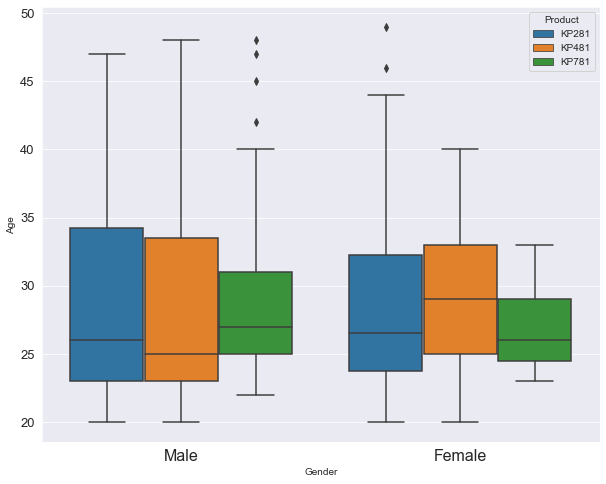

In [17]:
sns.set_style('darkgrid')
plt.figure(figsize=(10,8));plt.xticks(fontsize=16);plt.yticks(fontsize=13);

sns.boxplot(data=df, x='Gender', y='Age', hue='Product');

## **Insight** 
### Male: Median age of buying P1 and P2 is close to 25, Median age of buying P3 is greater than 25,
### Female: Median age of buying P1 and P2 is close to 25, Median age of buying P2 is close to 30.

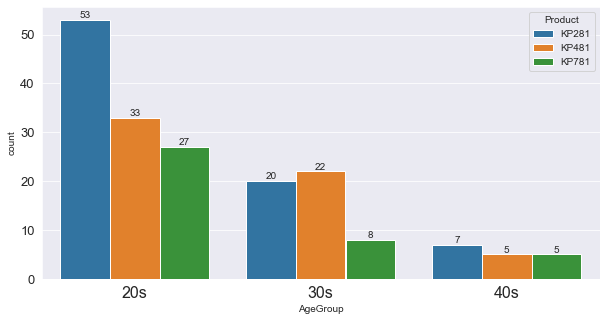

In [18]:
plt.figure(figsize=(10,5)); plt.xticks(fontsize=16);plt.yticks(fontsize=13);
ax = sns.countplot(data=df,x='AgeGroup', hue='Product');

for container in ax.containers:
    ax.bar_label(container)

## **Insight** 
### From above graph, Majority of customers who buy the Aerofit products are in their 20s or 30s 

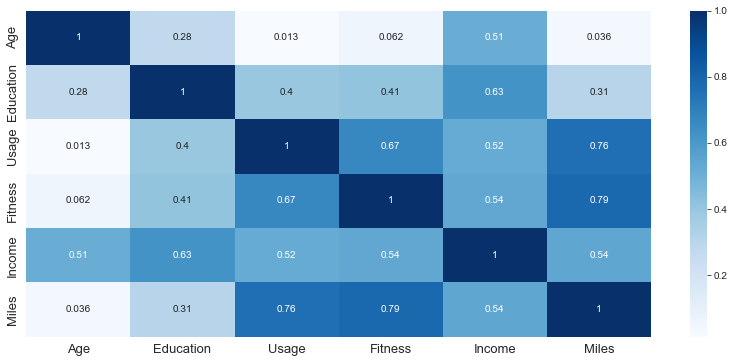

In [19]:
plt.figure(figsize=(14,6)); plt.xticks(fontsize=13);plt.yticks(fontsize=13);
sns.heatmap(df.corr(), annot=True, cmap='Blues');

## **Insight** 
### There seem to be a high correlation between (Usage/Fitness vs Miles), (Education vs Income) 

In [20]:
df.Usage.value_counts()

3    69
4    52
2    33
5    17
6     7
7     2
Name: Usage, dtype: int64

In [21]:
df.Fitness.value_counts()

3    97
5    31
2    26
4    24
1     2
Name: Fitness, dtype: int64

In [22]:
df.MilesGroup.value_counts()

50-100     97
100-150    38
150-200    22
0-50       17
200+        6
Name: MilesGroup, dtype: int64

## **Question**: 
### Do fit people or people who use the treadmill more often have a greater chance of purchasing P3?


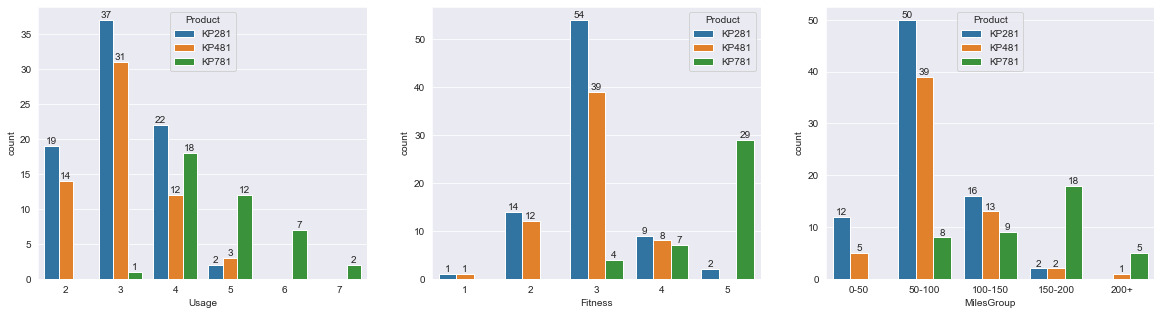

In [23]:
fig, ax =plt.subplots(1,3, figsize=(20,5))
ax1 = sns.countplot(data=df,x='Usage', hue='Product', ax= ax[0]); 
for container in ax1.containers:
    ax1.bar_label(container)
    
ax2 = sns.countplot(data=df,x='Fitness', hue='Product',ax= ax[1]);
for container in ax2.containers:
    ax2.bar_label(container)

ax3 = sns.countplot(data=df,x='MilesGroup', hue='Product',ax= ax[2]);
for container in ax3.containers:
    ax3.bar_label(container)


***
## **Insights**  -
 * ### **Usage**: People who plan to use the treadmill for 2-4 days tend to buy P1 or P2. People planning for using more than 4 days prefer to buy P3,
 * ### **Fitness**: People who rate either 2 or 3 tend to buy P1 or P2. People who rate 4 or more prefer to buy P3,
 * ### **Miles**: People who expect to walk/run upto 150 miles/week tend to buy P1 or P2. People who walk/run 150+ miles/week prefer to buy P3.
***

## Impact of Income vs Miles

In [24]:
sns.set_style('white');

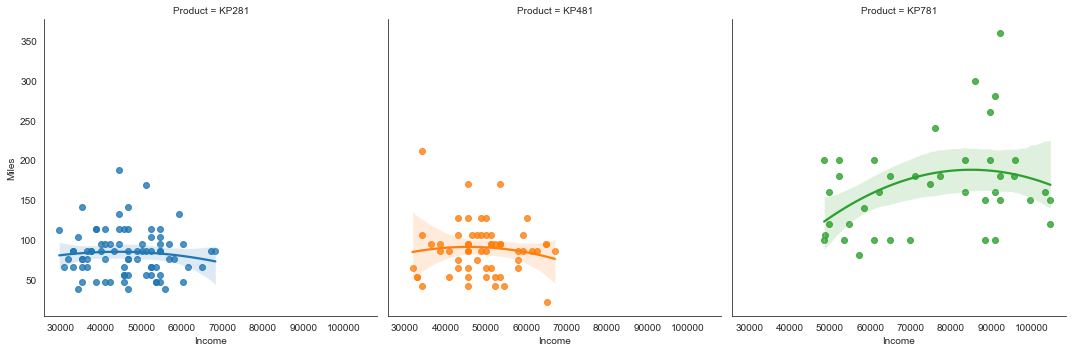

In [25]:
sns.lmplot(data=df, x='Income', y='Miles',hue='Product', col='Product', order=2);

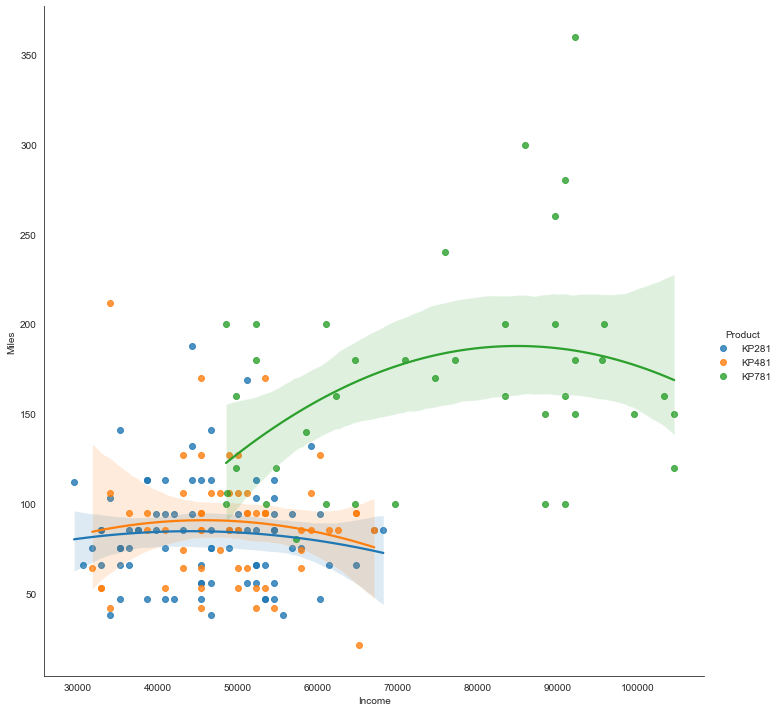

In [26]:
sns.lmplot(data=df, x='Income', y='Miles',hue='Product', order=2, height=10);

***
## **Insights** 
* ### People who earn between 30k - 60k, tend to buy **P1** or **P2** to run/walk atleast 50 miles
* ### People who earn between 50k-100k, prefer to buy **P3** to run/walk atleast 100 miles
* ### There is an overlap of P1, P2, P3 in 50k-70k region. Sales team should try to convice people earning 50k-70k to purchase P3 instead of P1/P2
***

## Correlation- Age vs Income vs Fitness

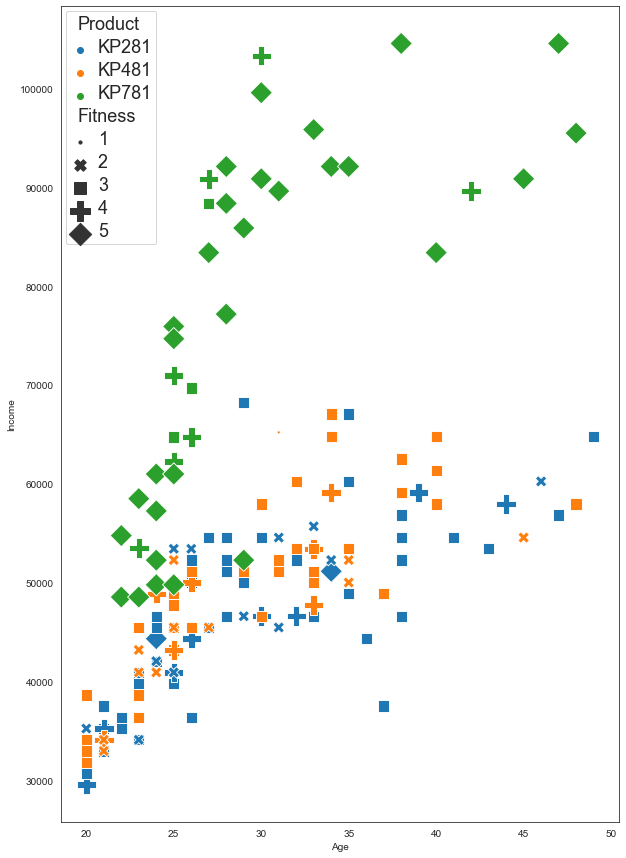

In [27]:
plt.figure(figsize=(10,15))

ax = sns.scatterplot(data=df, x='Age', y='Income', hue='Product', sizes=(10, 500),size='Fitness',style='Fitness');
plt.setp(ax.get_legend().get_texts(), fontsize='18'); # for legend text
plt.setp(ax.get_legend().get_title(), fontsize='30'); # for legend title

## **Insight** 
### As {Age & Income} increase (age>25, income> 65k), Customers rate their Fitness level to 3+ and prefer product P3

## Computing probabilities for [Gender, AgeGroup, Miles, Income, Fitness, Usage] wrt Products purchased

In [28]:
pd.crosstab(df['Gender'], df['Product'],normalize=True, margins=True)

Product,KP281,KP481,KP781,All
Gender,,,,
Female,0.222222,0.161111,0.038889,0.422222
Male,0.222222,0.172222,0.183333,0.577778
All,0.444444,0.333333,0.222222,1.000000


In [29]:
pd.crosstab(df['AgeGroup'], df['Product'],normalize=True, margins=True)

Product,KP281,KP481,KP781,All
AgeGroup,,,,
20s,0.294444,0.183333,0.150000,0.627778
30s,0.111111,0.122222,0.044444,0.277778
40s,0.038889,0.027778,0.027778,0.094444
All,0.444444,0.333333,0.222222,1.000000


In [30]:
pd.crosstab(df['MilesGroup'], df['Product'],normalize=True, margins=True)

Product,KP281,KP481,KP781,All
MilesGroup,,,,
0-50,0.066667,0.027778,0.000000,0.094444
50-100,0.277778,0.216667,0.044444,0.538889
100-150,0.088889,0.072222,0.050000,0.211111
150-200,0.011111,0.011111,0.100000,0.122222
200+,0.000000,0.005556,0.027778,0.033333
All,0.444444,0.333333,0.222222,1.000000


In [31]:
df['IncomeGroup'] = pd.cut(df['Income'], [20000,40000,60000,80000,100000,120000], labels=['20k-40k', '40k-60k','60k-80k' ,'80k-100k','100k+'])
df['UsageGroup'] = pd.cut(df['Usage'], [1,3,5, 7], labels=['1-3 days','4-5 days', '5+ days'])

In [32]:
pd.crosstab(df['IncomeGroup'], df['Product'],normalize=True, margins=True)

Product,KP281,KP481,KP781,All
IncomeGroup,,,,
20k-40k,0.127778,0.050000,0.000000,0.177778
40k-60k,0.283333,0.244444,0.061111,0.588889
60k-80k,0.033333,0.038889,0.055556,0.127778
80k-100k,0.000000,0.000000,0.088889,0.088889
100k+,0.000000,0.000000,0.016667,0.016667
All,0.444444,0.333333,0.222222,1.000000


In [33]:
pd.crosstab(df['UsageGroup'], df['Product'],normalize=True, margins=True)

Product,KP281,KP481,KP781,All
UsageGroup,,,,
1-3 days,0.311111,0.250000,0.005556,0.566667
4-5 days,0.133333,0.083333,0.166667,0.383333
5+ days,0.000000,0.000000,0.050000,0.050000
All,0.444444,0.333333,0.222222,1.000000


In [35]:
pd.crosstab(df['Fitness'], df['Product'],normalize=True, margins=True)

Product,KP281,KP481,KP781,All
Fitness,,,,
1,0.005556,0.005556,0.000000,0.011111
2,0.077778,0.066667,0.000000,0.144444
3,0.300000,0.216667,0.022222,0.538889
4,0.050000,0.044444,0.038889,0.133333
5,0.011111,0.000000,0.161111,0.172222
All,0.444444,0.333333,0.222222,1.000000


## User profile based Probability summary table

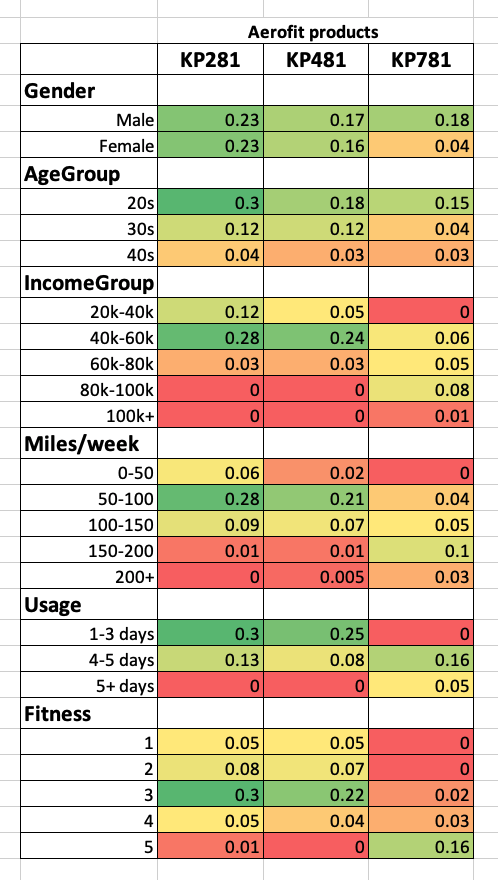

***
# Recommendations -

In [ ]:
agegroup1_purchaseValues = uniqueUsers_df[uniqueUsers_df.Age == '0-17']['Purchase'].to_list()
agegroup2_purchaseValues = uniqueUsers_df[uniqueUsers_df.Age == '18-25']['Purchase'].to_list()
agegroup3_purchaseValues = uniqueUsers_df[uniqueUsers_df.Age == '26-35']['Purchase'].to_list()
agegroup4_purchaseValues = uniqueUsers_df[uniqueUsers_df.Age == '36-45']['Purchase'].to_list()
agegroup5_purchaseValues = uniqueUsers_df[uniqueUsers_df.Age == '46-50']['Purchase'].to_list()
agegroup6_purchaseValues = uniqueUsers_df[uniqueUsers_df.Age == '51-55']['Purchase'].to_list()
agegroup7_purchaseValues = uniqueUsers_df[uniqueUsers_df.Age == '55+']['Purchase'].to_list()


* ### Recommend KP281(Entry level product) to young Users whose income is upto 50k/year and plan to walk/run 100 miles on treadmill for 1-3 days/week,
* ### Recommend KP481(Mid level product) to Users who are in their 30s/40s and their income range is 30k-70k and their fitness rating is 2-4,
* ### Recommend KP481(High end product) to Users above 30 years and who are earning atleast 50k
***